In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


In [2]:
train = pd.read_csv('train.csv', parse_dates=[1])
test = pd.read_csv('test.csv', parse_dates=[1])
df = train.copy()
df_test = test.copy()

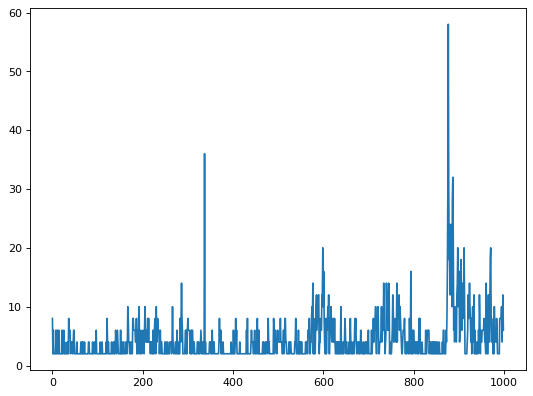

In [13]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.Count[0:1000])

In [6]:
df.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [14]:
df['year'] = df.Datetime.dt.year
df['month'] = df.Datetime.dt.month
df['day'] = df.Datetime.dt.day
df['hour'] = df.Datetime.dt.hour
df_test['year'] = df_test.Datetime.dt.year
df_test['month'] = df_test.Datetime.dt.month
df_test['day'] = df_test.Datetime.dt.day
df_test['hour'] = df_test.Datetime.dt.hour

In [16]:
df_test.head()

,ID,Datetime,year,month,day,hour
0,18288,2014-09-26 00:00:00,2014,9,26,0
1,18289,2014-09-26 01:00:00,2014,9,26,1
2,18290,2014-09-26 02:00:00,2014,9,26,2
3,18291,2014-09-26 03:00:00,2014,9,26,3
4,18292,2014-09-26 04:00:00,2014,9,26,4


In [19]:
# df.year = df.year - 2000
# df_test = df_test.year - 2000

In [63]:
df.head()

,ID,Datetime,Count,year,month,day,hour
0,0,2012-08-25 00:00:00,8,12,8,25,0
1,1,2012-08-25 01:00:00,2,12,8,25,1
2,2,2012-08-25 02:00:00,6,12,8,25,2
3,3,2012-08-25 03:00:00,2,12,8,25,3
4,4,2012-08-25 04:00:00,2,12,8,25,4


In [110]:
def qrtr(x):
    if x['month'] < 4:
        return 1
    elif x['month'] >=4 and x['month'] < 7:
        return 2
    elif x['month'] >=7 and x['month'] < 10:
        return 3
    elif x['month'] >=10 and x['month'] < 13:
        return 4

In [111]:
df['qrtr'] = df.apply(qrtr, axis=1)

In [113]:
df.head()

,ID,Datetime,Count,year,month,day,hour,qrtr
0,0,2012-08-25 00:00:00,8,12,8,25,0,3
1,1,2012-08-25 01:00:00,2,12,8,25,1,3
2,2,2012-08-25 02:00:00,6,12,8,25,2,3
3,3,2012-08-25 03:00:00,2,12,8,25,3,3
4,4,2012-08-25 04:00:00,2,12,8,25,4,3


,ID,Datetime,Count,year,month,day,hour,qrtr
384,384,2012-10-09 00:00:00,2,12,10,9,0,4
385,385,2012-10-09 01:00:00,2,12,10,9,1,4
386,386,2012-10-09 02:00:00,2,12,10,9,2,4
387,387,2012-10-09 03:00:00,2,12,10,9,3,4
388,388,2012-10-09 04:00:00,2,12,10,9,4,4
...,...,...,...,...,...,...,...,...
17923,17923,2014-10-09 19:00:00,690,14,10,9,19,4
17924,17924,2014-10-09 20:00:00,648,14,10,9,20,4
17925,17925,2014-10-09 21:00:00,612,14,10,9,21,4
17926,17926,2014-10-09 22:00:00,538,14,10,9,22,4
